## 1. <font color='red'> 

In [88]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [3]:

path=os.chdir("..")                   #Moving back one folder


In [4]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [5]:
final_path= path+"\\Data\\movie_metadata.csv" #setting up the final path in final_path

In [6]:
df= pd.read_csv(final_path)
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [7]:
df1=df.dropna()                         #dropping all the NA values
#df1.head()

In [8]:
df1.to_csv('null.csv', sep=',')

In [9]:
df_year=df1.groupby('title_year')['movie_title'].count()

In [10]:
df_year_count= df_year.to_frame().reset_index()

In [11]:
df_year_count.head()

title_year  movie_title
0      1927.0            1
1      1929.0            1
2      1933.0            1
3      1935.0            1
4      1936.0            1

## <font color='red'> 1. Finding out in which year range the number of films in the dataset is the most </font>

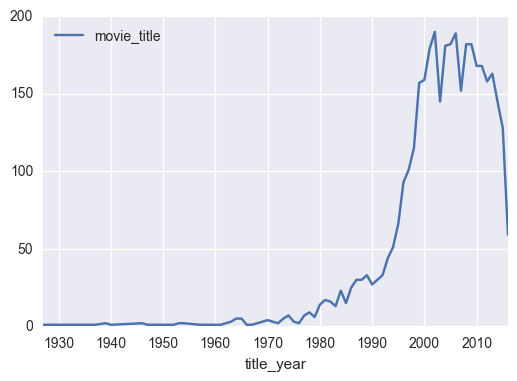

In [12]:
df_year_count.plot(x='title_year',y='movie_title',kind='line')

## <font color='Green'>CONCLUSION:The dataset has the highest number of films between the year 2000-2020  </font> 

## imdb over years

In [13]:
df_imdb_year=df1.groupby('title_year' ,as_index=False)['imdb_score'].mean()

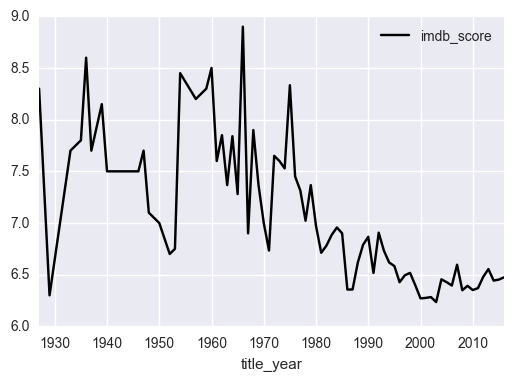

In [14]:
df_imdb_year.plot(x='title_year', y='imdb_score', kind='line', cmap='copper')

## It has no direct pattern but can surely see increase in number of films has caused decrease in quality. More quantity less quality

In [15]:
df_movies_year_gross = df1.groupby(['title_year'], as_index=False)['gross'].sum()
#df_movies_year_gross.head()

In [16]:
df_year_count= df_year_count.merge(df_movies_year_gross)

In [17]:
#df_year_count.head()

In [18]:
df_year_count[['title_year','gross']] = df_year_count[['title_year','gross']].apply(pd.to_numeric)

In [19]:
df_year_count.head()

title_year  movie_title      gross
0      1927.0            1    26435.0
1      1929.0            1  2808000.0
2      1933.0            1  2300000.0
3      1935.0            1  3000000.0
4      1936.0            1   163245.0

In [30]:
df_year_count['Average']= df_year_count['gross']/df_year_count['movie_title'] 

In [31]:
df_year_count= df_year_count[(df_year_count.title_year> 1980)]

In [32]:
df_year_count.head()

title_year  movie_title         gross       Average
38      1981.0           17  7.048333e+08  4.146078e+07
39      1982.0           16  1.200601e+09  7.503755e+07
40      1983.0           13  8.922934e+08  6.863795e+07
41      1984.0           23  1.447611e+09  6.293960e+07
42      1985.0           15  8.883470e+08  5.922313e+07

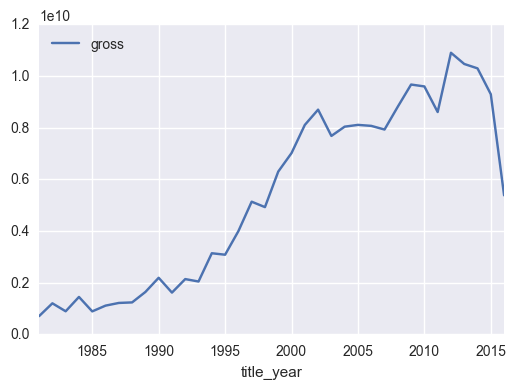

In [47]:
df_year_count.plot(x='title_year', y='gross', kind='line', )

## Revenue Plot

In [36]:
df_movies_year_budget = df1.groupby(['title_year'], as_index=False)['budget'].sum()
df_movies_year_budget.head()


title_year     budget
0      1927.0  6000000.0
1      1929.0   379000.0
2      1933.0   439000.0
3      1935.0   609000.0
4      1936.0  1500000.0

In [40]:
df_year_count_budget= df_year_count.merge(df_movies_year_budget)

In [41]:
df_year_count_budget[['title_year','budget']] = df_year_count_budget[['title_year','budget']].apply(pd.to_numeric)

In [44]:
df_year_count_budget['Average_Budget']= df_year_count['budget']/df_year_count['movie_title'] 

In [45]:
df_year_count_budget= df_year_count_budget[(df_year_count_budget.title_year> 1980)]

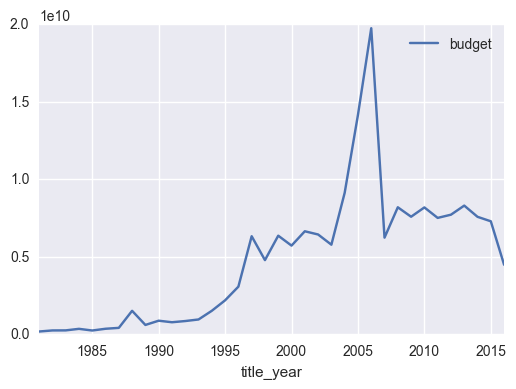

In [48]:
df_year_count.plot(x='title_year', y='budget', kind='line', )

## Can see there is a pattern between the three plots i.e IMDB_Score vs Budget vs Gross pver the years. To get a better idea we will plot a 3-d interactive plot

#### since it is an interactive plot we will have to run matplotlib notebook just for this plot.

In [51]:
%matplotlib notebook

<IPython.core.display.Javascript object>


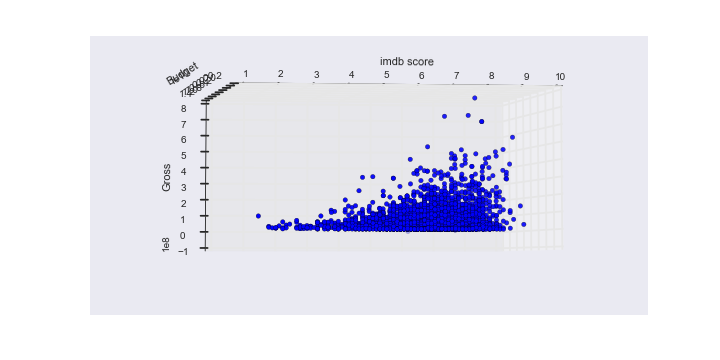

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,5)).gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
x =df1['imdb_score']
y =df1['budget']
z =df1['gross']



fig.scatter(x, y, z)

fig.set_xlabel('imdb score')
fig.set_ylabel('Budget')
fig.set_zlabel('Gross')

plt.show()

## The above plot clearly indicates that imdb and gross(revenue) are directly related. With increase in IMDB 

## Q. Is budget directly related to profit?

In [57]:
df2 = df[np.isfinite(df['budget'])]

In [58]:
df2=df2[np.isfinite(df2['gross'])]

In [60]:
df2['net']= df2['gross']-df2['budget']
#df_2006['Net']= df_2006['gross']-df_2006['budget']
df2['net_percentage']= df2['net']/df2['budget']
df2['net_percentage']= df2['net_percentage']*100

In [67]:
df2

color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11               Color        Bryan Singer                   434.0     169.0   
12               Color        Marc Forster                   403.0     106.0   
13               Color      Gore Verbinski                   313.0     151.0   
14               Color      Gore Verbinski                   450.0     150.0   
15               Color         Zack Snyder                   733.0     143.0   
16               Color      Andrew Adamson                   258.0     150.0   
17               Color         Joss Whedon                   703.0     173.0   
18               Color        Rob Marshall                   448.0     136.0   
19               Color    Barry Sonnenfeld                   451.0     106.0   
20               Color       Peter Jackson                   422.0     164.0   
21               Color           Marc Webb                   599.0     153.0   
22               Color        Ridley Scott                   343.0     156.0   
23               Color       Peter Jackson                   509.0     186.0   
24               Color         Chris Weitz                   251.0     113.0   
25               Color       Peter Jackson                   446.0     201.0   
26               Color       James Cameron                   315.0     194.0   
27               Color       Anthony Russo                   516.0     147.0   
28               Color          Peter Berg                   377.0     131.0   
29               Color     Colin Trevorrow                   644.0     124.0   
30               Color          Sam Mendes                   750.0     143.0   
...                ...                 ...                     ...       ...   
4959             Color     Robert Townsend                    21.0      81.0   
4962   Black and White       Larry Blamire                    88.0      90.0   
4964             Color           E.L. Katz                   193.0      88.0   
4971             Color      Dennis Iliadis                   241.0     114.0   
4973   Black and White    Darren Aronofsky                   138.0      84.0   
4975             Color     Myles Berkowitz                    32.0      87.0   
4977             Color     Morgan Spurlock                   193.0     100.0   
4978             Color       Brandon Trost                    66.0      82.0   
4979             Color        Joe Swanberg                    65.0      82.0   
4984             Color        Edward Burns                    36.0      98.0   
4987             Color         Lena Dunham                   113.0      98.0   
4997             Color  David Gordon Green                    75.0      90.0   
4998             Color        Kevin Jordan                    21.0      90.0   
5004             Color          Mike Bruce                     3.0      78.0   
5008   Black and White         Kevin Smith                   136.0     102.0   
5009             Color       James Bidgood                     8.0      65.0   
5011             Color         Neil LaBute                    80.0      97.0   
5012             Color          David Ayer                   233.0     109.0   
5015   Black and 

In [77]:
%matplotlib inline

In [68]:
df3=df2.groupby(['title_year'], as_index=False)['net'].max()

<IPython.core.display.Javascript object>


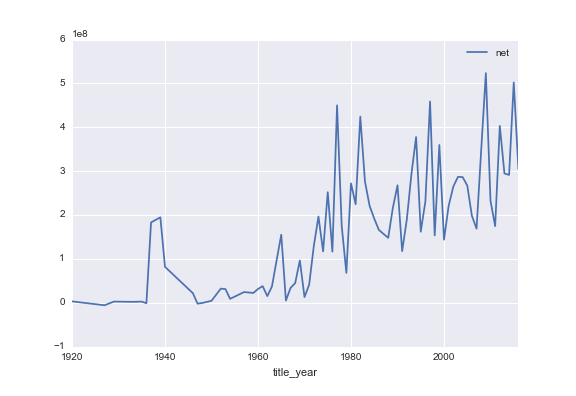

In [63]:
df3.plot(x='title_year',y='net', kind='line')

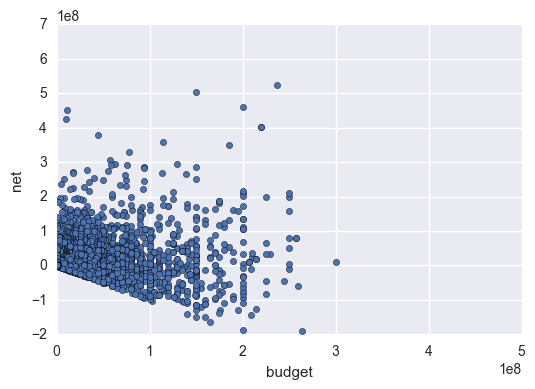

In [80]:
df2.plot(x='budget',y='net',kind='scatter', xlim=(0000000000,500000000), ylim=(-200000000,700000000))

In [81]:
df_budget_net=( df2[['net','budget']].corr())
df_budget_net

net    budget
net     1.000000 -0.951709
budget -0.951709  1.000000

## CONCLUSION: 
### 1. FROM the above graph you can clearly see that's not the case. YES, there are instances when net profit has reached highest point for few high budget movies. But, the general trend shows that it mostly decreases with increase in budget
### 2. Even the Coorelation proves that net and budget are nit directly related

## WITH WHICH FACTOS IS PROFIT ACTUALLY RELATED IN THE DATASET?


In [82]:
corr = df2.corr()

In [83]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

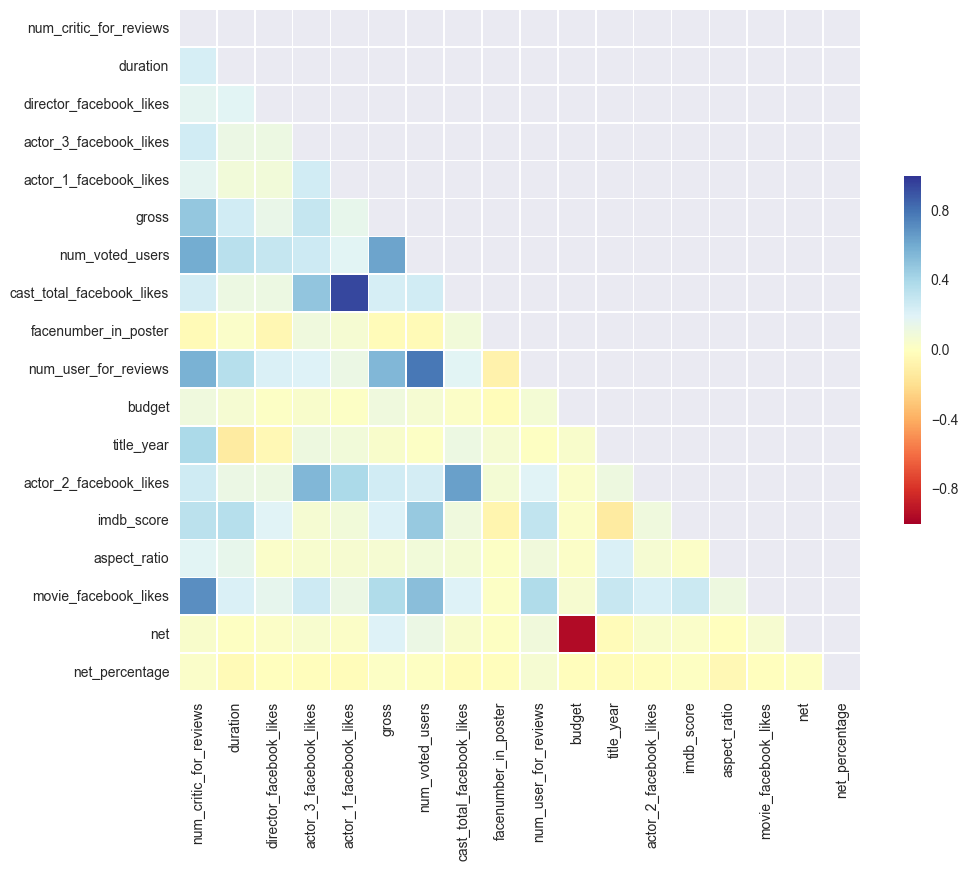

In [84]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='RdYlBu', vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Conclusion: Net and Net percentage does not have any direct relation with any of the other element.

## <font color='red'> 2. For the year range 2000-2020 we will find out what was their gross and budget </font>

In [24]:
df_gross_years= df1[(df1['title_year']>2000.0)&(df1['title_year']<2020.0)]

In [25]:
df1.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
5         ...                         738.0  English      USA           PG-13   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
5  263700000.0      2012.0                  632.0        6.6          2.35   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
5                24000  

[5 rows x 28 columns]

In [26]:
df_gross_years1=df_gross_years.groupby('title_year')['movie_title'].count()

In [27]:
df_sort= df1.loc[:,['title_year','budget']]
df_sort.sort_values(by='budget', ascending=False).head()

title_year        budget
2988      2006.0  1.221550e+10
3859      2005.0  4.200000e+09
3005      2005.0  2.500000e+09
2323      1997.0  2.400000e+09
2334      2004.0  2.127520e+09

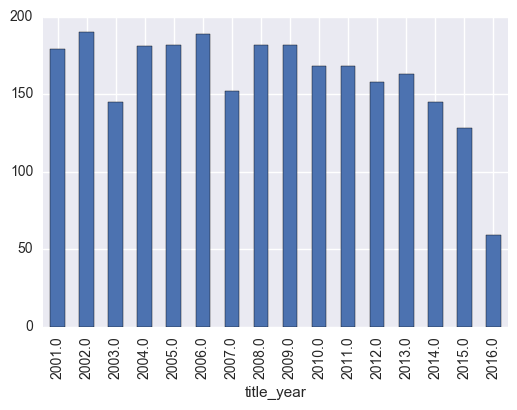

In [28]:
df_gross_years1.plot(kind='bar')

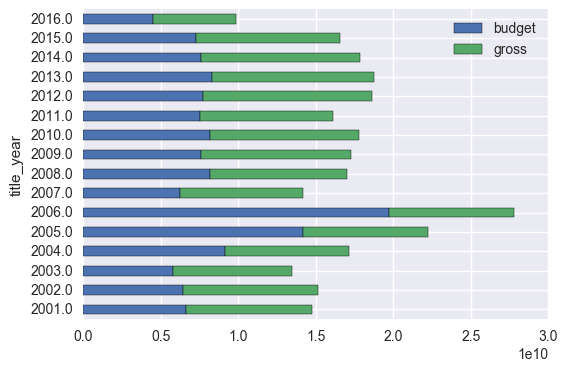

In [29]:
df_gross= df_gross_years.groupby('title_year')['budget','gross'].sum().plot.barh(stacked=True)
df_gross1= df_gross_years.groupby('title_year')['budget','gross'].sum()

##  <font color='green'> Conclusion: Stacked Bar plot shows following results:  
1. The budget of movies increased significantly from 2004 upto 2006. Highest being in 2016.
2. Number of movies released in 2006 was almost equal to 2002,2004,2005,2008,2009 but the budgetin 2006 was quite    high. Comparing the the gross 2006 had the lowest gross which indicates many high budget films didn't do well in the box office.
3. From the dataframe(df_sort) we can clearly see that the top budget films are between 2005 aqnd 2006.


</font>

## Which country has the highest number of movies?


In [120]:
df_num_movies_country= df1.groupby(['country'])['movie_title'].count().reset_index()

In [121]:
df_num_movies_country.head()

country  movie_title
0  Afghanistan            1
1    Argentina            3
2        Aruba            1
3    Australia           39
4      Belgium            1

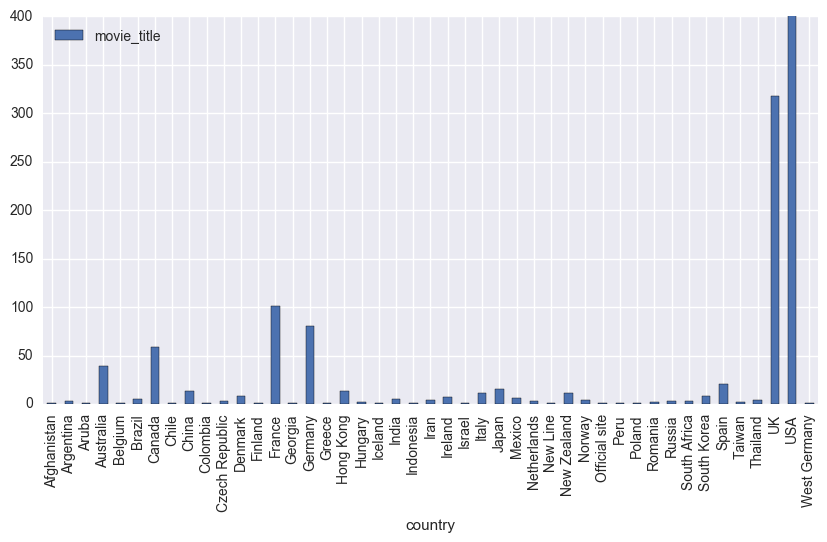

In [127]:
df_num_movies_country.plot(x='country',y ='movie_title', kind='bar', ylim=(0,400), figsize=(10,5))

### USA leads with the most number of films in the dataset. The big 5 are USA, UK, Germany, France and Canada.
### We will now figure out which language is the most used in the database

In [129]:
df_num_lan= df1.groupby(['language'])['movie_title'].count().reset_index()

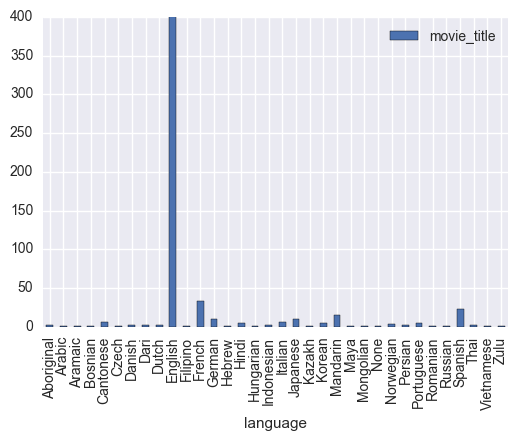

In [132]:
df_num_lan.plot(x='language',y='movie_title', kind='bar', ylim=(0,400))

## ENglish is the highest use language in the dataset followed by French, Spanish, Mandarian and Japanese
